### Data visualization on Canadian immigration Flows

Dataset Source: International migration flows to and from selected countries - the 2015 revision "https://www.un.org/development/desa/pd/data/international-migration-flows"

- The dataset contains annual data on the flows of international migrants as recorded by the countries of destination. 
- The data presents both inflows and outflows according to the place of birth, citizenship or place of previous / next residence both for foreigners and nationals. 
- The current version presents data available from 45 countries.
- we'll focus on Canadian immigration data

In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [8]:
! pip install openpyxl #a module that pandas requires to read Excel files

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: C:\Users\207498\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [15]:
df = pd.read_excel('Canada.xlsx',sheet_name='Canada by Citizenship',skiprows=range(20),skipfooter=2)

In [16]:
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [18]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 43 entries, Type to 2013
dtypes: int64(37), object(6)
memory usage: 65.6+ KB


In [24]:
df.columns

Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

In [25]:
df.shape

(195, 43)

In [26]:
df.rename(columns={'OdName':'Country','AreaName':'Continent','RegName':'Region'},inplace=True)
df.columns

Index([     'Type',  'Coverage',   'Country',      'AREA', 'Continent',
             'REG',    'Region',       'DEV',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

In [27]:
#drop the unecessary columns
df.drop(columns=['AREA','REG','DEV','Type','Coverage'],inplace=True)
df.head(3)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331


In [38]:
#adding 'Total' columns that sum up the total immigrants by country over the entire period 1980-2013
df['Total'] = df.iloc[:,4:].sum(axis=1)
df['Total']

0      58639
1      15699
2      69439
3          6
4         15
       ...  
190    97146
191        2
192     2985
193     1677
194     8598
Name: Total, Length: 195, dtype: int64

In [39]:
#let's check for the null value.
df.isnull().sum()

Country      0
Continent    0
Region       0
DevName      0
1980         0
1981         0
1982         0
1983         0
1984         0
1985         0
1986         0
1987         0
1988         0
1989         0
1990         0
1991         0
1992         0
1993         0
1994         0
1995         0
1996         0
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
Total        0
dtype: int64

In [40]:
#a quick summary
df.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,691.133333,714.389744,843.241026,...,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564,32867.451282
std,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,2109.205607,2443.606788,2555.048874,...,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988,91785.498686
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,...,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000,952.000000
50%,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,26.000000,34.000000,44.000000,...,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000,5018.000000
75%,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,434.000000,409.000000,508.500000,...,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000,22239.500000
max,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,21337.000000,27359.000000,23795.000000,...,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000,691904.000000


In [41]:
#we will set country as index column
df.set_index('Country',inplace=True)
df.head(3)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439


In [42]:
df.loc['Japan']

Continent                 Asia
Region            Eastern Asia
DevName      Developed regions
1980                       701
1981                       756
1982                       598
1983                       309
1984                       246
1985                       198
1986                       248
1987                       422
1988                       324
1989                       494
1990                       379
1991                       506
1992                       605
1993                       907
1994                       956
1995                       826
1996                       994
1997                       924
1998                       897
1999                      1083
2000                      1010
2001                      1092
2002                       806
2003                       817
2004                       973
2005                      1067
2006                      1212
2007                      1250
2008                      1284
2009    

In [43]:
#convert the column name to string type 
df.columns = list(map(str,df.columns))

In [44]:
years = list(map(str, range(1980,2014)))
print(years)

['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']


In [47]:
# df.loc['Haiti',list(map(str,range(1990,2014)))]
df.loc[(df['Continent']=='Africa')&(df['Region']=='Southern Africa')]

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Botswana,Africa,Southern Africa,Developing regions,10,1,3,3,7,4,2,...,7,11,8,28,15,42,53,64,76,396
Lesotho,Africa,Southern Africa,Developing regions,1,1,1,2,7,5,3,...,4,0,4,1,8,7,1,0,6,107
Namibia,Africa,Southern Africa,Developing regions,0,5,5,3,2,1,1,...,6,19,13,26,14,16,23,24,83,320
South Africa,Africa,Southern Africa,Developing regions,1026,1118,781,379,271,310,718,...,988,1111,1200,1123,1188,1238,959,1243,1240,40568
Swaziland,Africa,Southern Africa,Developing regions,4,1,1,0,10,7,1,...,7,7,5,6,10,3,13,17,39,188


In [53]:
df.loc[:,['2010','Total']].sort_values(by='Total',ascending=False)

,2010,Total
Country,,
India,34235,691904
China,30391,659962
United Kingdom of Great Britain and Northern Ireland,8724,551500
Philippines,38617,511391
Pakistan,6811,241600
...,...,...
San Marino,1,5
New Caledonia,0,5
Marshall Islands,0,2


In [59]:
#plot a line graph of immgration from Haiti
haiti = df.loc['Haiti',years] #Creating a series
haiti

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
1985    1321
1986    1753
1987    2132
1988    1829
1989    2377
1990    2379
1991    2829
1992    2399
1993    3655
1994    2100
1995    2014
1996    1955
1997    1645
1998    1295
1999    1439
2000    1631
2001    2433
2002    2174
2003    1930
2004    1652
2005    1682
2006    1619
2007    1598
2008    2491
2009    2080
2010    4744
2011    6503
2012    5868
2013    4152
Name: Haiti, dtype: object

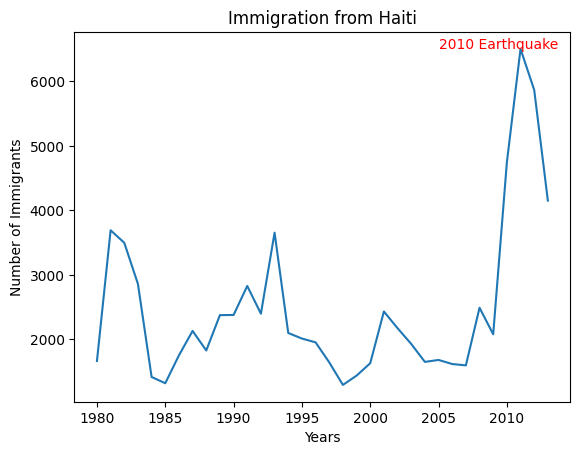

In [63]:
haiti.plot(kind='line')
plt.title('Immigration from Haiti')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')
plt.text(25,6500,'2010 Earthquake',color='red')
plt.show()


In [71]:
#Let's compare the number of immigrants from India and Chain from 1980 to 2013
#get the dataset for India and China 
indo_china = df.loc[['India','China'],years]
indo_china

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129


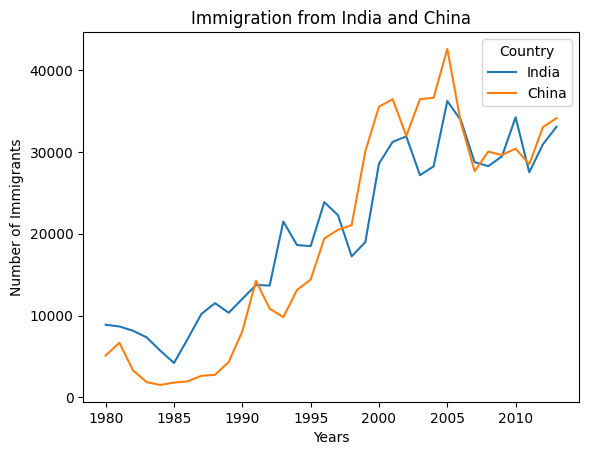

In [74]:
indo_china = indo_china.T
indo_china.plot(kind='line')
plt.title('Immigration from India and China')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')
plt.show()

In [85]:
#compare the trend of top 5 countries that contributed the most immigration to Cannada
top_5 = df.sort_values(by='Total',ascending=False).head(5)[years].head(5)

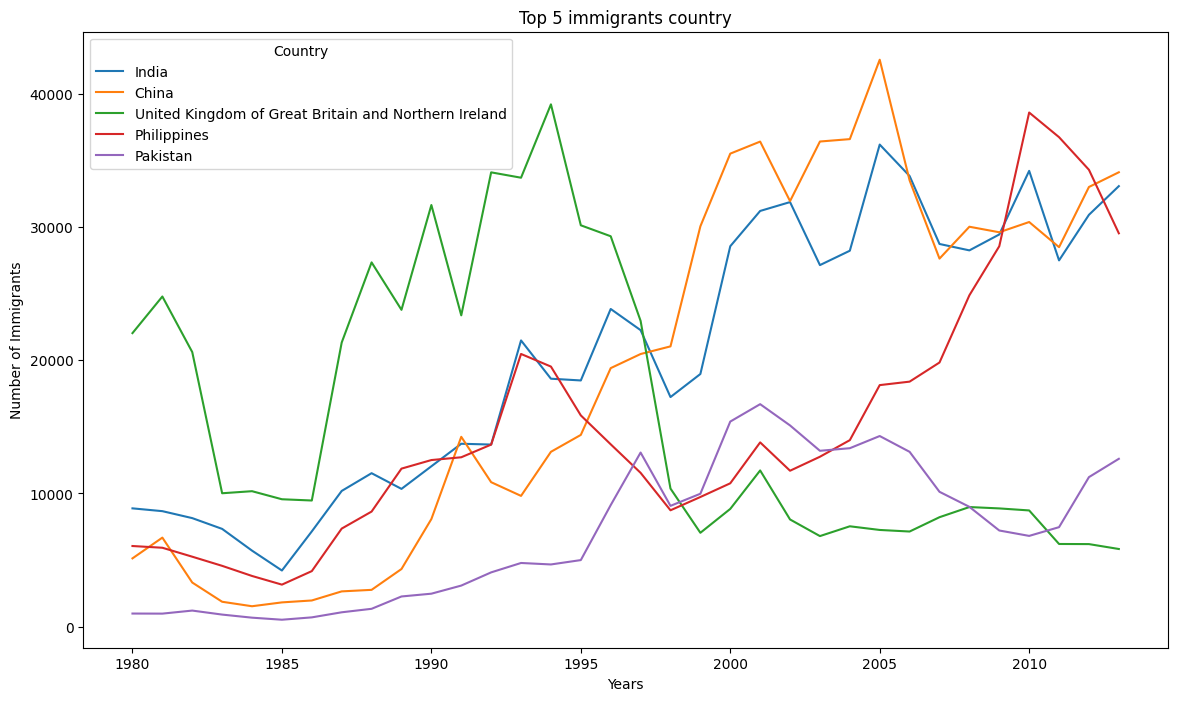

In [89]:
top_5 = top_5.T
top_5.plot(kind='line',figsize=(14,8))
plt.title('Top 5 immigrants country')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')
plt.show()

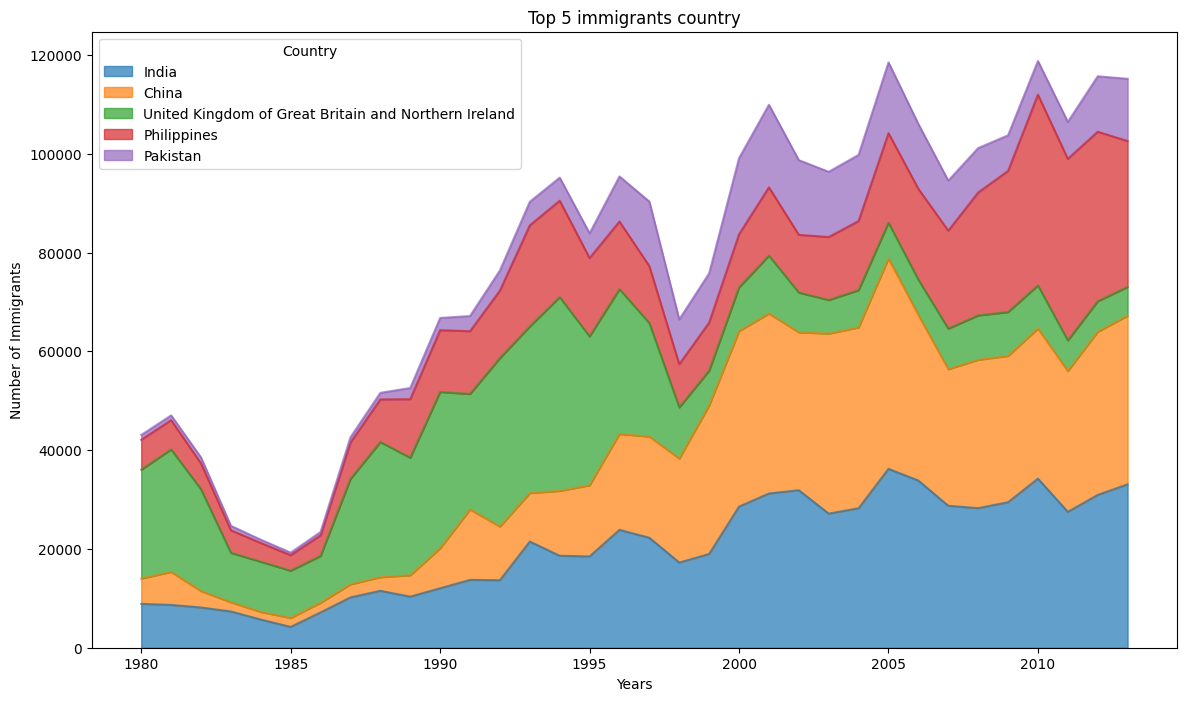

In [119]:
top_5.plot(kind='area',figsize=(14,8),alpha=0.7)
plt.title('Top 5 immigrants country')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')
plt.show()

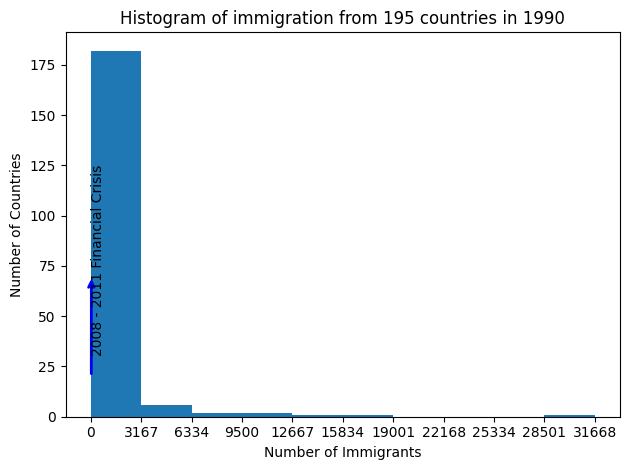

In [111]:
#Lets diplay the distribution for the year of 1990
count, bin_edges = np.histogram(df['1990'])
df['1990'].plot(kind='hist',xticks=bin_edges)
# Annotate arrow
plt.annotate('',  # s: str. Will leave it blank for no text
             xy=(32, 70),  # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),  # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',  # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )

# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis',  # text to display
             xy=(28, 30),  # start the text at at point (year 2008 , pop 30)
             rotation=90,  # based on trial and error to match the arrow
             va='bottom',  # want the text to be vertically 'bottom' aligned
             ha='left',  # want the text to be horizontally 'left' algned.
             )

plt.title('Histogram of immigration from 195 countries in 1990')
plt.xlabel('Number of Immigrants')
plt.ylabel('Number of Countries')
plt.tight_layout()
plt.show()

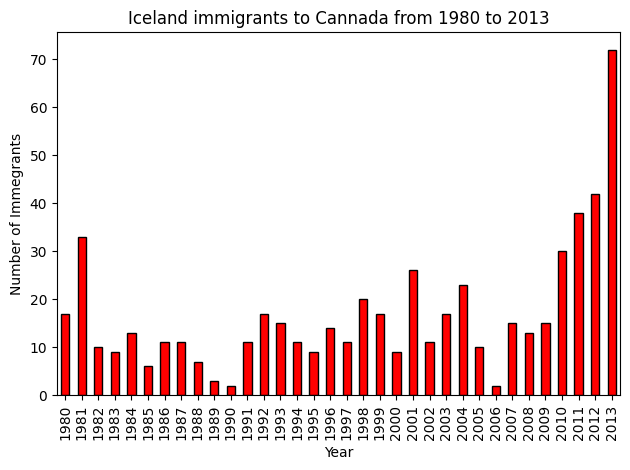

In [96]:
iceland = df.loc['Iceland',years]
iceland.plot(kind='bar',color='red',edgecolor='black')
plt.title('Iceland immigrants to Cannada from 1980 to 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immegrants')
plt.tight_layout()
plt.show()

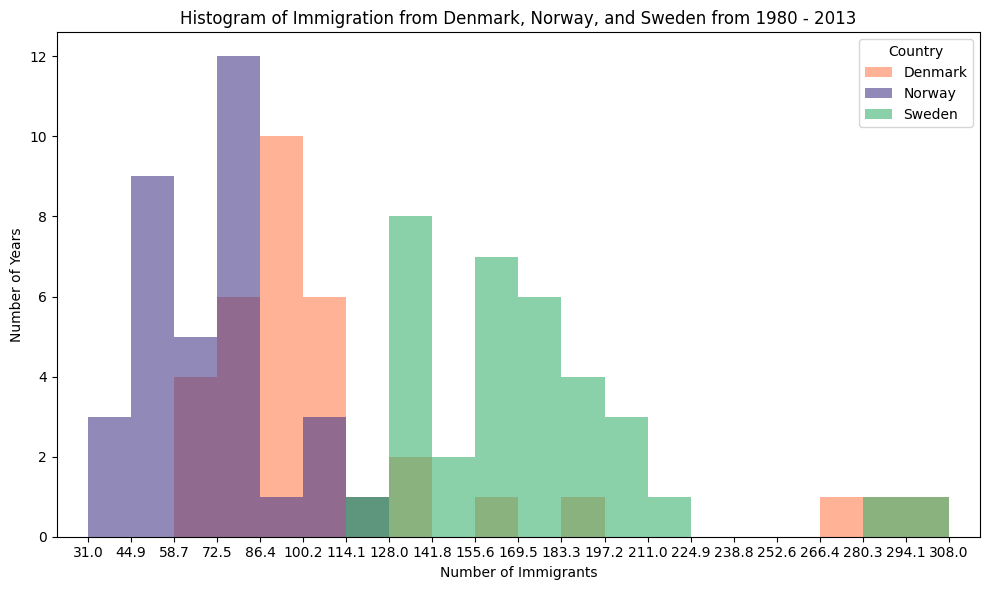

In [107]:
#What is the immigration distribution for Denmark, Norway and sweden for years 1980-2013?
df_t = df.loc[['Denmark','Norway','Sweden'],years].T
count, bin_edges = np.histogram(df_t,20)
xmin = bin_edges[0] - 10
xmax = bin_edges[-1] + 10
df_t.plot(kind='hist', figsize=(10, 6),
          bins=20,alpha=0.6,
          xticks=bin_edges,color=['coral', 'darkslateblue', 'mediumseagreen'],
          xlim=(xmin,xmax))


plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')
plt.tight_layout()
plt.show()

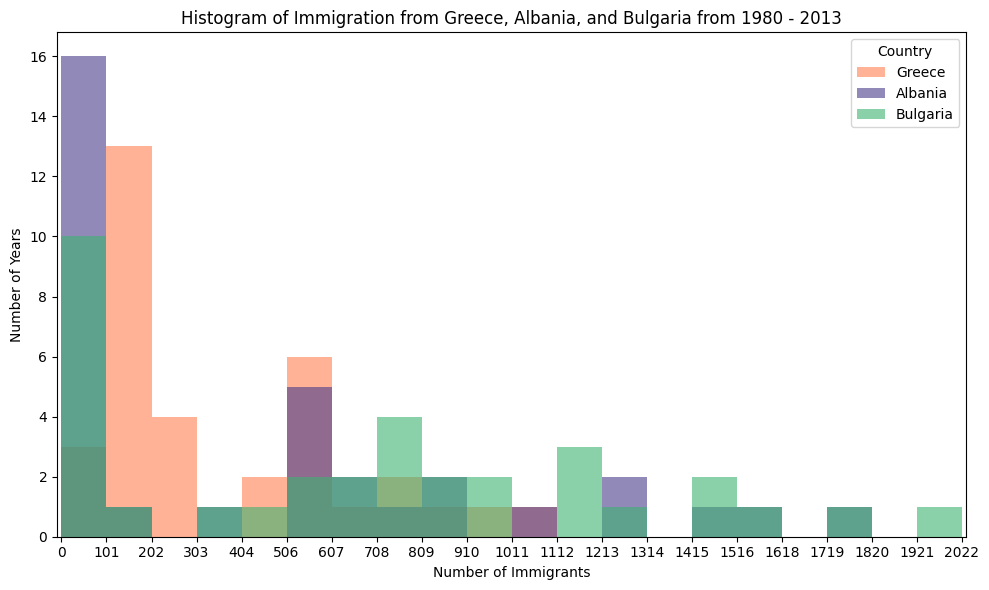

In [108]:
df_t = df.loc[['Greece','Albania','Bulgaria'],years].T
count, bin_edges = np.histogram(df_t,20)
xmin = bin_edges[0] - 10
xmax = bin_edges[-1] + 10
df_t.plot(kind='hist', figsize=(10, 6),
          bins=20,alpha=0.6,
          xticks=bin_edges,color=['coral', 'darkslateblue', 'mediumseagreen'],
          xlim=(xmin,xmax))


plt.title('Histogram of Immigration from Greece, Albania, and Bulgaria from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')
plt.tight_layout()
plt.show()

In [112]:
#create a bar plot showing the total number of immigrants to Canada from the top 15 countries, label each country with the total immigrant count.
df.sort_values(by='Total',ascending=False,inplace=True)
df_15 = df['Total'].head(15)
df_15

Country
India                                                   691904
China                                                   659962
United Kingdom of Great Britain and Northern Ireland    551500
Philippines                                             511391
Pakistan                                                241600
United States of America                                241122
Iran (Islamic Republic of)                              175923
Sri Lanka                                               148358
Republic of Korea                                       142581
Poland                                                  139241
Lebanon                                                 115359
France                                                  109091
Jamaica                                                 106431
Viet Nam                                                 97146
Romania                                                  93585
Name: Total, dtype: int64

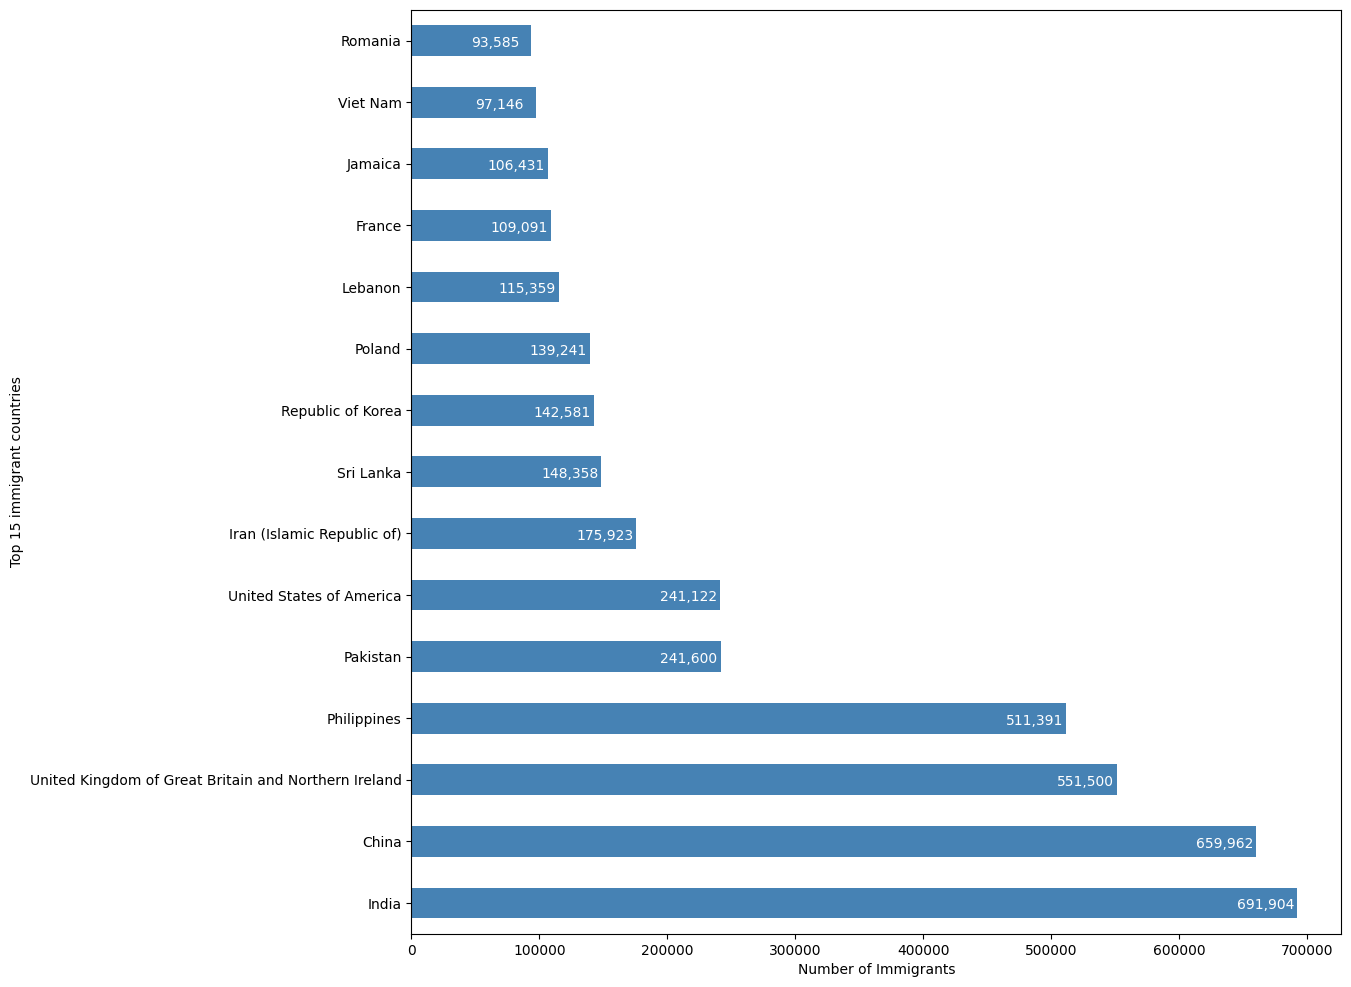

In [116]:
df_15.plot(kind='barh',figsize=(12,12),color='steelblue')
plt.xlabel('Number of Immigrants')
plt.ylabel('Top 15 immigrant countries')
for index, value in enumerate(df_15):
    label = format(int(value),',')
    plt.annotate(label,xy=(value-47000,index-0.10),color='white')
plt.show()

In [127]:
#let's use a pie chart to eplore the proportion(percentage) of new immigrants grouped by continents foe the entire period from 1980 to 2013
df_continent = df.groupby(by='Continent').sum()

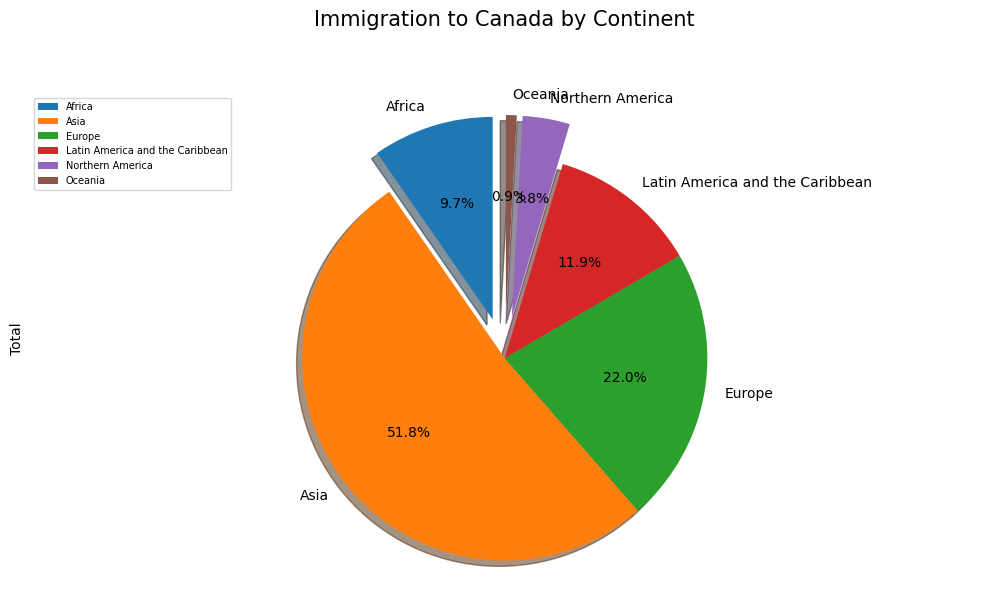

In [145]:
df_continent['Total'].plot(kind='pie',
                           figsize=(10,6),
                           autopct='%1.1f%%',
                           startangle=90,
                           shadow=True,
                           explode=[0.2, 0, 0, 0, 0.2, 0.2])
plt.title('Immigration to Canada by Continent', y=1.12, fontsize = 15)
plt.axis('Equal')
plt.legend(labels=df_continent.index,loc='upper left',fontsize=7)
plt.tight_layout()
plt.show()

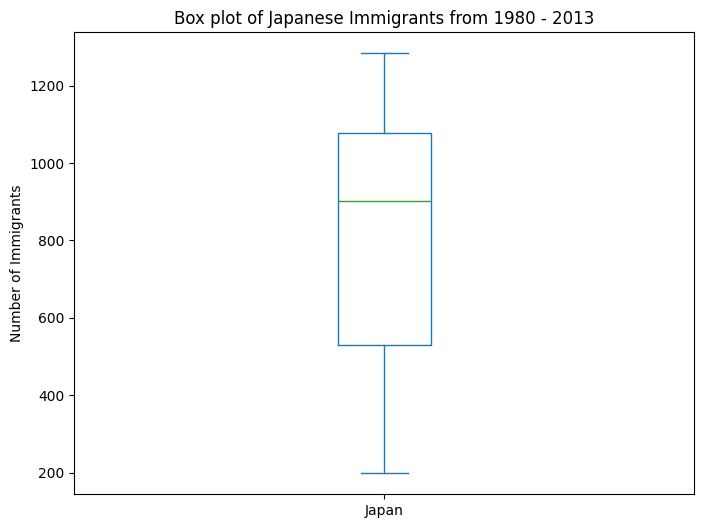

In [146]:
#Let's plot the box plot for the Japanese immigrants
df_Japan = df.loc[['Japan'],years].T
df_Japan.plot(kind='box',figsize=(8,6))
plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')
plt.show()

In [148]:
df_Japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


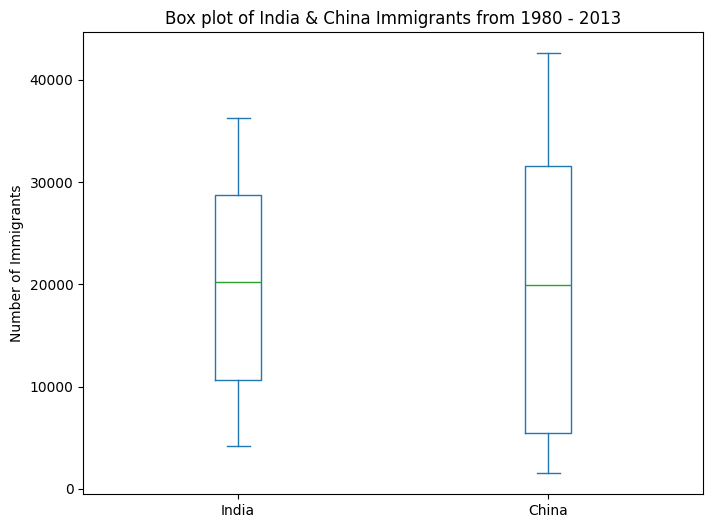

In [149]:
#Compare the distribution of the number of new immigrants from India and China for the period 1980 - 2013
df_CI = df.loc[['India','China'],years].T
df_CI.plot(kind='box',figsize=(8,6))
plt.title('Box plot of India & China Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')
plt.show()


We can observe that, while both countries have around the same median immigrant population (~20000), China's immigrant population range is more spread out than India's.

In [150]:
df_CI.describe()

Country,India,China
count,34.000000,34.000000
mean,20350.117647,19410.647059
std,10007.342579,13568.230790
min,4211.000000,1527.000000
25%,10637.750000,5512.750000
50%,20235.000000,19945.000000
75%,28699.500000,31568.500000
max,36210.000000,42584.000000


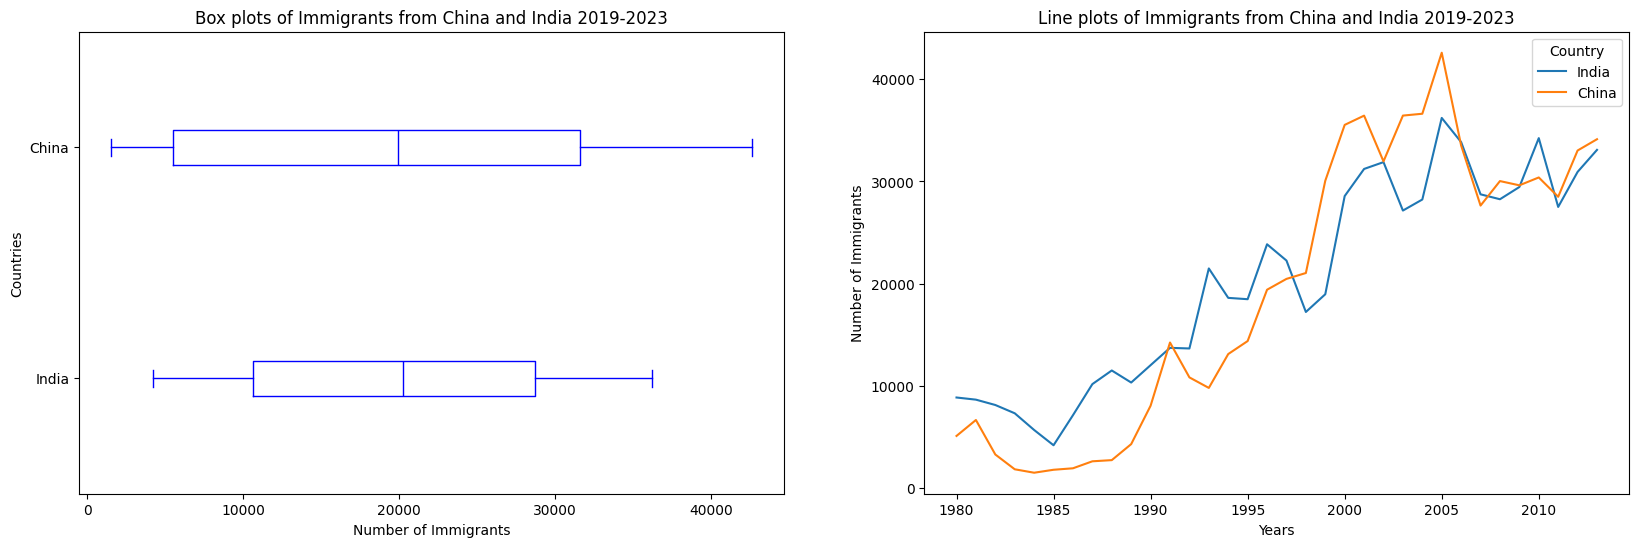

In [153]:
fig = plt.figure()
ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

df_CI.plot(kind='box',color='blue',vert=False,figsize=(20,6),ax=ax0)
ax0.set_title('Box plots of Immigrants from China and India 2019-2023')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

df_CI.plot(kind='line',figsize=(20,6),ax=ax1)
ax1.set_title('Line plots of Immigrants from China and India 2019-2023')
ax1.set_xlabel('Years')
ax1.set_ylabel('Number of Immigrants')

plt.show()

In [154]:
#Create a box plot to visualize the distribution of the top 
#15 countries(based on total immigration) grouped by decades 1980s,1990s, and 2000s

In [157]:
df_top15 = df.sort_values(by='Total',ascending=False).head(15)
df_top15

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,1208,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581


In [159]:
#create a list of all decades
years_80s = list(map(str,range(1980,1990)))
years_90s = list(map(str,range(1990,2000)))
years_00s = list(map(str,range(2000,2010)))

df_80s = df_top15.loc[:,years_80s].sum(axis=1)
df_90s = df_top15.loc[:,years_90s].sum(axis=1)
df_00s = df_top15.loc[:,years_00s].sum(axis=1)

new_df = pd.DataFrame({
    '1980s' : df_80s,
    '1990s':df_90s,
    '2000s':df_00s
})

new_df.head()

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
Pakistan,10591,65302,127598


In [160]:
new_df.describe()

,1980s,1990s,2000s
count,15.000000,15.000000,15.000000
mean,44418.333333,85594.666667,97471.533333
std,44190.676455,68237.560246,100583.204205
min,7613.000000,30028.000000,13629.000000
25%,16698.000000,39259.000000,36101.500000
50%,30638.000000,56915.000000,65794.000000
75%,59183.000000,104451.500000,105505.500000
max,179171.000000,261966.000000,340385.000000


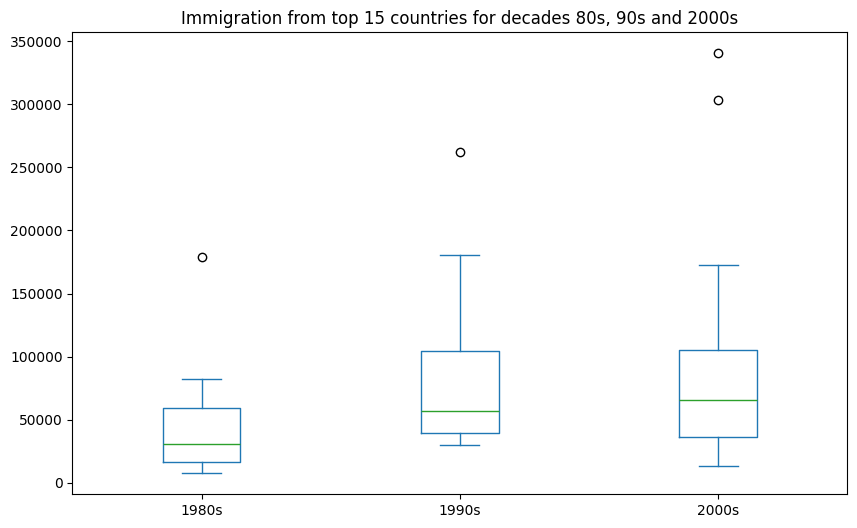

In [161]:
new_df.plot(kind='box', figsize=(10, 6))
plt.title('Immigration from top 15 countries for decades 80s, 90s and 2000s')
plt.show()

In [168]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df[years].sum(axis=0))
# change the years to type int (useful for regression later on)
df_tot.index = map(int, df_tot.index)
# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)
# rename columns
df_tot.columns = ['year', 'total']
# view the final dataframe
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


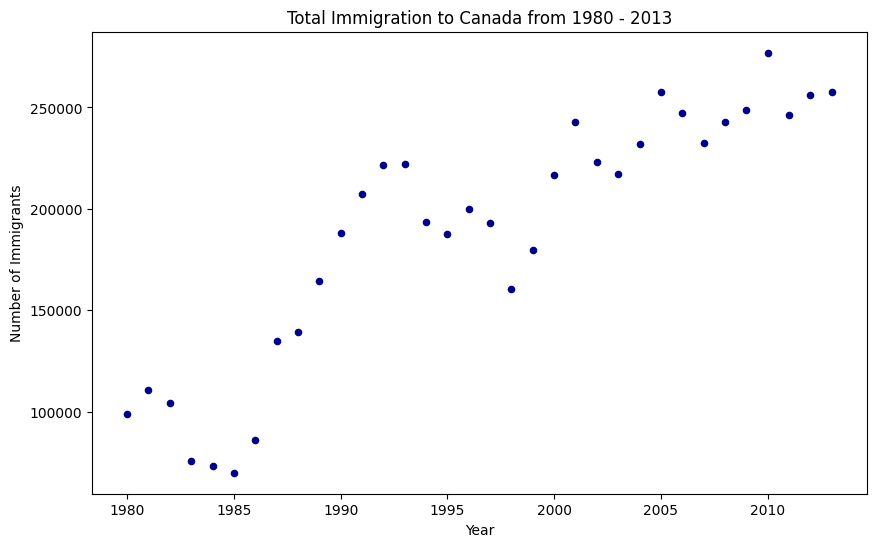

In [169]:
df_tot.plot(kind='scatter',x='year',y='total',figsize=(10,6),color='darkblue')
plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

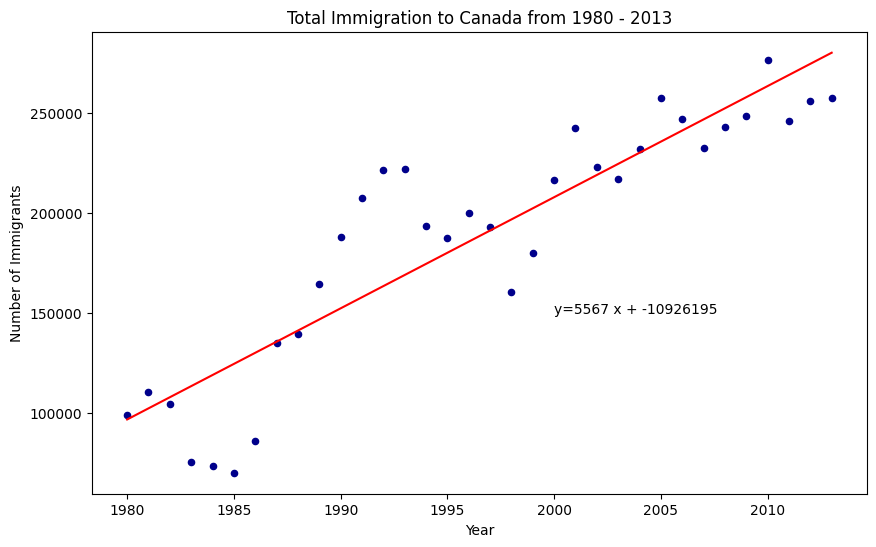

'No. Immigrants = 5567 * Year + -10926195'

In [170]:
x = df_tot['year']      # year on x-axis
y = df_tot['total']     # total on y-axis
fit = np.polyfit(x, y, deg=1)
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1]) 

In [171]:
# transposed dataframe
df_can_t = df[years].transpose()

# cast the Years (the index) to type int
df_can_t.index = map(int, df_can_t.index)

# let's label the index. This will automatically be the column name when we reset the index
df_can_t.index.name = 'Year'

# reset index to bring the Year in as a column
df_can_t.reset_index(inplace=True)

# view the changes
df_can_t.head()

Country,Year,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan,United States of America,Iran (Islamic Republic of),Sri Lanka,Republic of Korea,...,Kiribati,Vanuatu,Sao Tome and Principe,Tuvalu,American Samoa,San Marino,New Caledonia,Marshall Islands,Western Sahara,Palau
0,1980,8880,5123,22045,6051,978,9378,1172,185,1011,...,0,0,0,0,0,1,0,0,0,0
1,1981,8670,6682,24796,5921,972,10030,1429,371,1456,...,0,0,0,1,1,0,0,0,0,0
2,1982,8147,3308,20620,5249,1201,9074,1822,290,1572,...,0,0,0,0,0,0,0,0,0,0
3,1983,7338,1863,10015,4562,900,7100,1592,197,1081,...,1,0,0,0,0,0,0,0,0,0
4,1984,5704,1527,10170,3801,668,6661,1977,1086,847,...,0,0,0,1,0,0,0,0,0,0


In [172]:
# normalize Brazil data
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

# normalize Argentina data
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

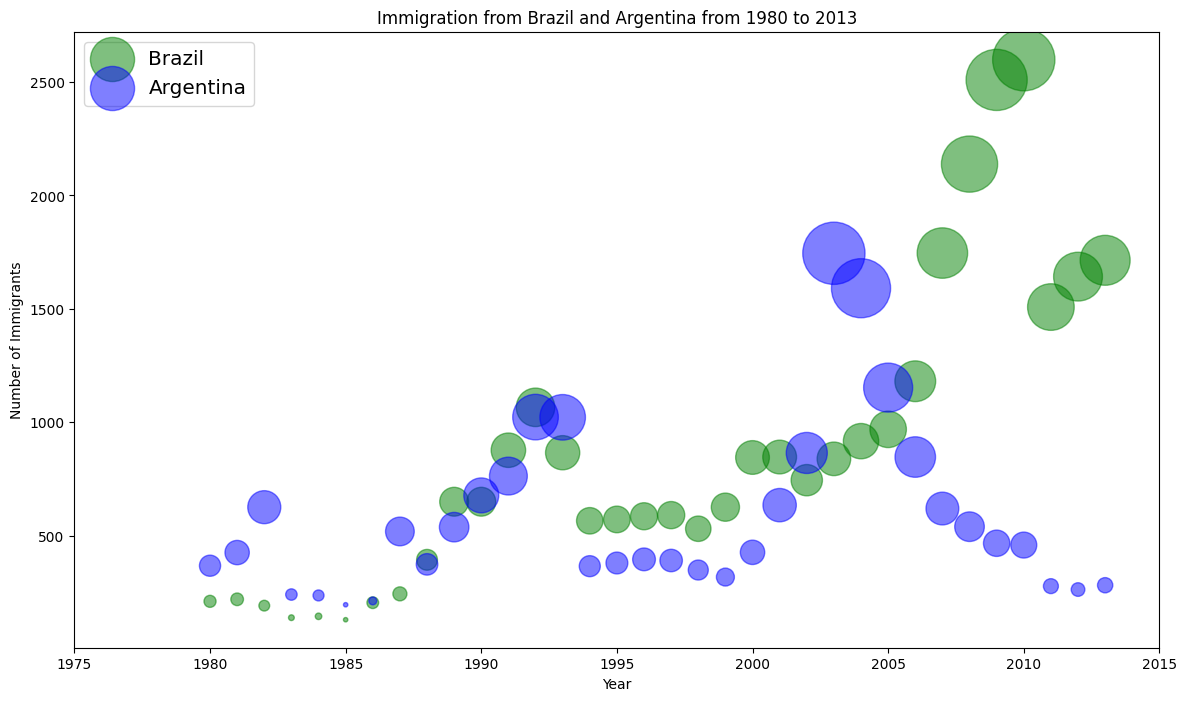

In [173]:
# Brazil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,  # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                    )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax=ax0
                    )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 to 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

**Plotting directly with matplotlib**

In [179]:
df_line = df[years]
total_immigrants = df_line.sum()
total_immigrants

1980     99137
1981    110563
1982    104271
1983     75550
1984     73417
1985     69978
1986     86048
1987    134771
1988    139306
1989    164432
1990    188054
1991    207509
1992    221687
1993    222049
1994    193665
1995    187712
1996    200085
1997    192885
1998    160727
1999    179818
2000    216712
2001    242643
2002    223111
2003    217297
2004    232083
2005    257457
2006    247057
2007    232405
2008    243047
2009    248768
2010    276956
2011    246194
2012    256222
2013    257537
dtype: int64

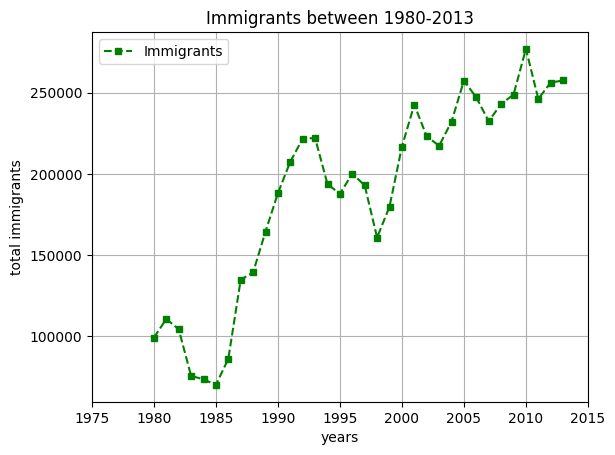

In [187]:
fig, ax = plt.subplots()
total_immigrants.index = total_immigrants.index.map(int)

ax.plot(total_immigrants,
        marker='s',
        markersize=5,
        color='green',
        linestyle='dashed')

ax.set_title('Immigrants between 1980-2013')
ax.set_xlabel('years')
ax.set_ylabel('total immigrants')
ax.legend(['Immigrants'])

plt.xlim(1975,2015)
plt.grid(True)

plt.show()

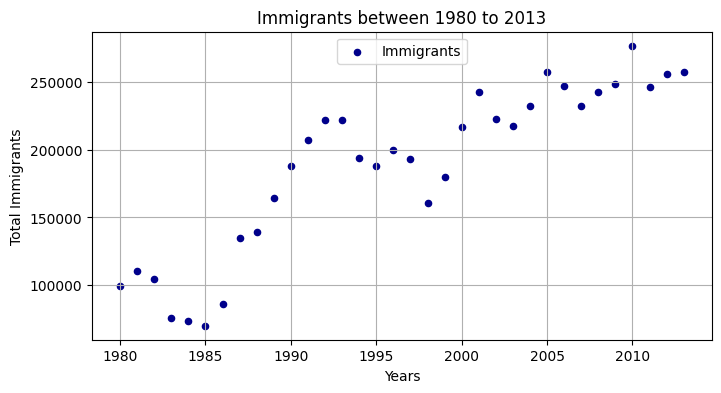

In [191]:
#Create figure and axes
fig, ax = plt.subplots(figsize=(8, 4))
total_immigrants.index = total_immigrants.index.map(int)

# Customizing Scatter Plot 
ax.scatter(total_immigrants.index, total_immigrants, 
           marker='o', #setting up the markers
           s = 20, #setting up the size of the markers
           color='darkblue')#the color for the marker

#add title 
plt.title('Immigrants between 1980 to 2013') 
#add labels 
plt.xlabel('Years')
plt.ylabel('Total Immigrants') 
#including grid
plt.grid(True)

#Legend at upper center of the figure
ax.legend(["Immigrants"], loc='upper center')

#Display the plot
plt.show()

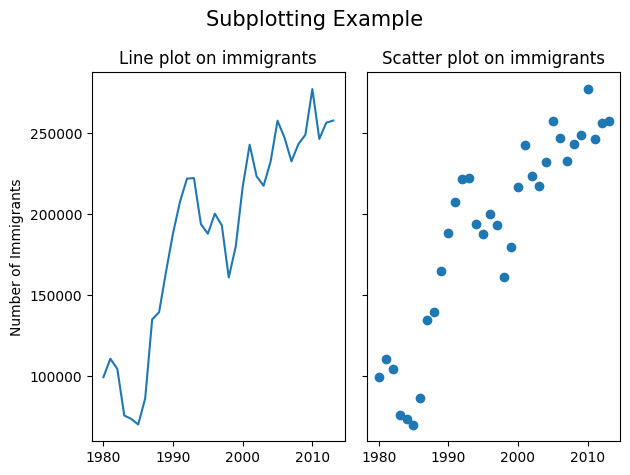

In [192]:
# Create a figure with two axes in a row

fig, axs = plt.subplots(1, 2, sharey=True)

#Plotting in first axes - the left one
axs[0].plot(total_immigrants)
axs[0].set_title("Line plot on immigrants")

#Plotting in second axes - the right one
axs[1].scatter(total_immigrants.index, total_immigrants)
axs[1].set_title("Scatter plot on immigrants")

axs[0].set_ylabel("Number of Immigrants")
            
#Adding a Title for the Overall Figure
fig.suptitle('Subplotting Example', fontsize=15)

# Adjust spacing between subplots
fig.tight_layout()


# Show the figure
plt.show()

similarly, with bar and histograms
ax.bar()
ax.hist()

Seaborn is a python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics. 

<Axes: xlabel='Continent', ylabel='count'>

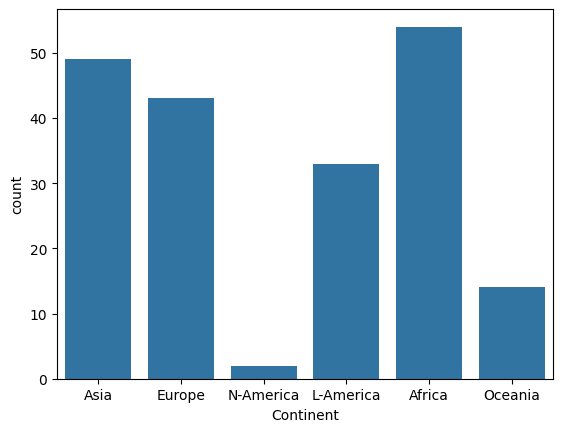

In [195]:
import seaborn as sns
df_can = df.replace('Latin America and the Caribbean', 'L-America')
df_can = df_can.replace('Northern America','N-America')
sns.countplot(data=df_can,x='Continent')

<Axes: xlabel='Continent', ylabel='Total'>

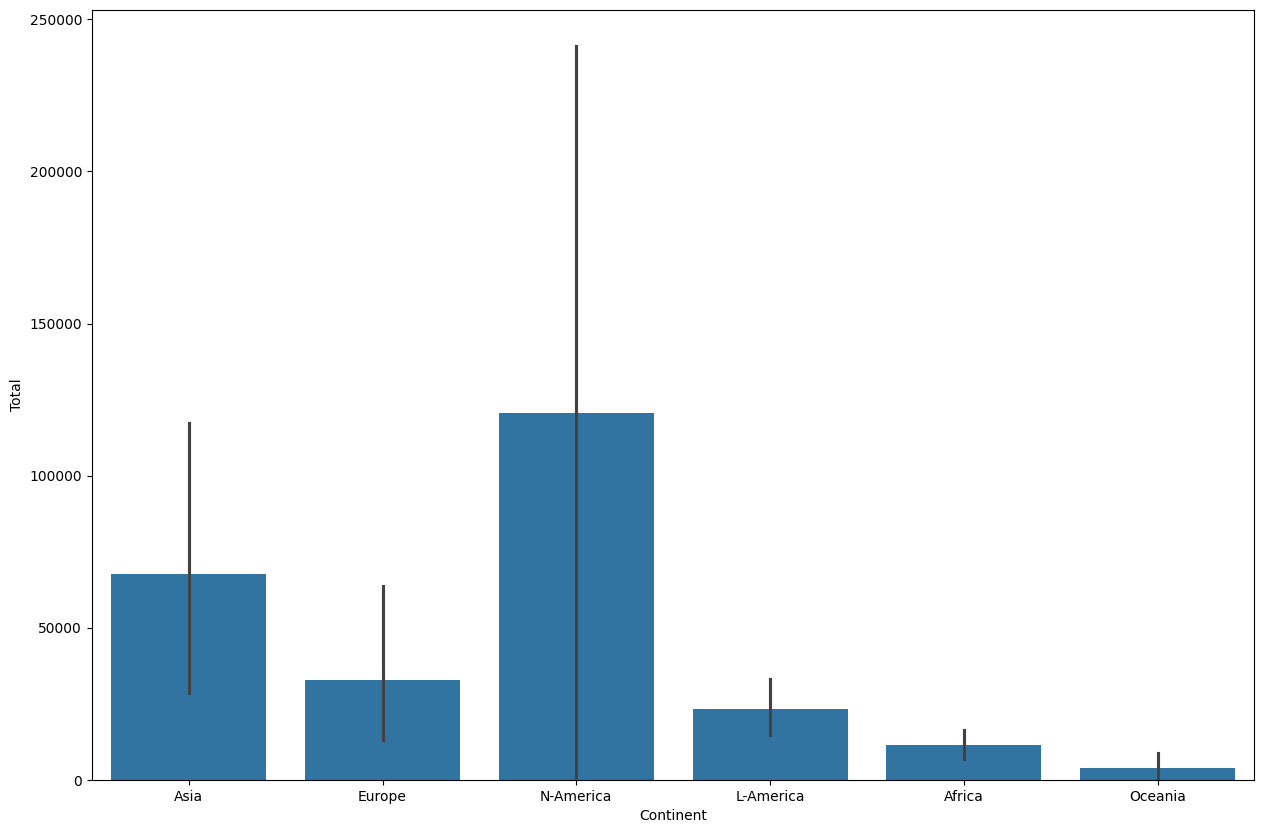

In [196]:
plt.figure(figsize=(15,10))
sns.barplot(data=df_can,x='Continent',y='Total')

In [197]:
df_Can1=df_can.groupby('Continent')['Total'].mean()
df_Can1

Continent
Africa        11462.000000
Asia          67710.081633
Europe        32812.720930
L-America     23186.303030
N-America    120571.000000
Oceania        3941.000000
Name: Total, dtype: float64